# In Class Assignments Lessons M9
## Michael Triner

## M9 4 September 2018

In [4]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## (1)

# Reading in a table called tip

In [76]:
tip = Table.read_table('tips.csv')
tip

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


## Creating a new table (new tip) with the columns tip and sex from tip and then counting the total tips for each sex

In [15]:
newTip = tip.select(1,2)
totalMF = tip.select(2).group('sex')
totalMF

sex,count
Female,87
Male,157


### Summing the total tips for each sex and finding the average tip per sex

In [18]:
totalTip = newTip.group(['sex'],sum)
totalTip.with_column('Avg Tip',totalTip.column(1)/totalMF.column(1))

sex,tip sum,Avg Tip
Female,246.51,2.83345
Male,485.07,3.08962


### Creating an overlaid histogram of the tips by sex

C:\Users\C19Michael.Triner\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


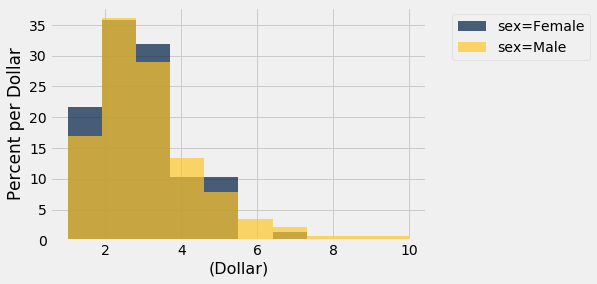

In [43]:
newTip.hist('tip',group='sex',unit='Dollar')


### Creating an overlaid histogram of the tips by time

C:\Users\C19Michael.Triner\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


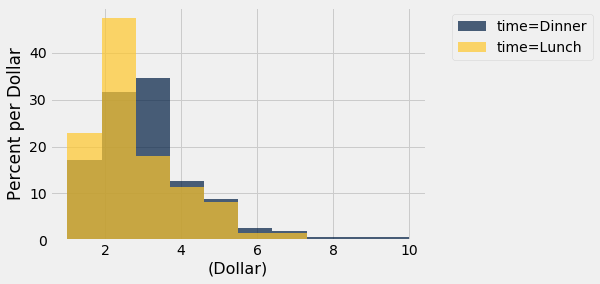

In [44]:
timeTip = tip.select(1,5)
timeTip.hist('tip',group='time',unit='Dollar')

## (2)

### Creating a function which takes in a string of days of the week abbreviations and outputs the corresponding number with Mon being 1

In [80]:
def weekday_to_num(x):
    """Creating a function which takes in a string of days of the week abbreviations
    and outputs the corresponding number with Mon being 1"""
    if x== 'Mon':
        x = 1
    elif x== 'Tues':
        x = 2
    elif x== 'Wed':
        x = 3
    elif x== 'Thur':
        x = 4
    elif x== 'Fri':
        x = 5
    elif x== 'Sat':
        x = 6
    elif x== 'Sun':
        x = 7
    return(x)

## (3)

### Applying the weekday_to_num function on the tip table's day column to change the day abbreviation to the number

In [82]:
tips = tip.with_column('weekday_num',tip.apply(weekday_to_num,'day'))
tips

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


## (4)

### Defining a function est_tip which takes in a total bill and a window which to check the average tip for the total bill and outputs the average tip

In [90]:
def est_tip(total_bill,window):
    """takes in a total bill and a window which to check the average tip for the total bill and outputs the average tip"""
    funTipsTable = tips.select(0,1)
    funTipsTable = funTipsTable.where('total_bill',are.between(total_bill-window,total_bill+window+.01))
    avg_tip = (funTipsTable.column('tip').sum())/len(funTipsTable.column('tip'))
    
    return(avg_tip)
    

In [91]:
est_tip(20,1)
#Running the function est_tip to find the estimate tip for a $20 bill with a window of 1

3.143333333333333

## (5)

### Applying the est_tip to the tips table total bill column to see what the estimated tip would be on the total bill with a window of 1, then adding the new estimated tip column to the old tip table

In [92]:
tips = tips.with_column('estimated_tip',tips.apply(est_tip,'total_bill',1))
tips

total_bill,tip,sex,smoker,day,time,size,weekday_num,estimated_tip
16.99,1.01,Female,No,Sun,Dinner,2,7,2.80618
10.34,1.66,Male,No,Sun,Dinner,3,7,1.90276
21.01,3.5,Male,No,Sun,Dinner,3,7,3.19939
23.68,3.31,Male,No,Sun,Dinner,2,7,3.57681
24.59,3.61,Female,No,Sun,Dinner,4,7,3.6575
25.29,4.71,Male,No,Sun,Dinner,4,7,3.67526
8.77,2,Male,No,Sun,Dinner,2,7,1.85483
26.88,3.12,Male,No,Sun,Dinner,4,7,3.72424
15.04,1.96,Male,No,Sun,Dinner,2,7,2.54036
14.78,3.23,Male,No,Sun,Dinner,2,7,2.46231


### Creating a scatter plot from the tips table using the total bill and and plotting the tip and the estimated tip for that bill

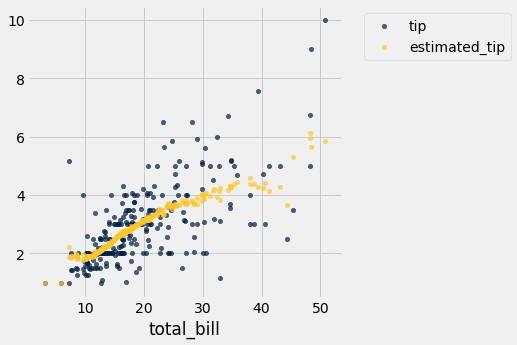

In [93]:
tips.select(0,1,8).scatter('total_bill')